# **Graduate Rotational Internship Program(GRIP) @ The Sparks Foundation**

# **Data Science and Business Analytics Intern**

# **Task 6:- Prediction Using Decision Tree Algorithm**

## **Author:- Gowtham Vinayagamurthy**

### **Aim**
In this task of supervised machine learning, The objective of the task is to create and train a decision tree using the Iris dataset. Afterwards we also have to make predictions on the new dataset and test the accuracy of the model.

### **Programing Language:- Python**

### **Intergrated Development Environment (IDE):- Jupyter Notebook**

### **Dataset:- https://bit.ly/3kXTdox**

#### **Decision Tree Algorithm**

Decision trees are a type of machine-learning algorithm that can be used for both classification and regression tasks. They work by learning simple decision rules inferred from the data features. These rules can then be used to predict the value of the target variable for new data samples. Decision trees are represented as tree structures, where each internal node represents a feature, each branch represents a decision rule, and each leaf node represents a prediction. The algorithm works by recursively splitting the data into smaller and smaller subsets based on the feature values. At each node, the algorithm chooses the feature that best splits the data into groups with different target values. <br>

**Understanding Decision Trees** <br>A flexible and comprehensible machine learning approach for classification and regression applications is the decision tree. The conclusion, such as a class label for classification or a numerical value for regression, is represented by each leaf node in the tree-like structure that is constructed, with each internal node representing a judgment or test on a feature. To divide the data into subsets that are as pure as possible about the target variable, the tree is built recursively, beginning at the root node and selecting the most informative characteristic. The aforementioned procedure persists until a halting condition is fulfilled, generally at attaining a specific depth or upon the node possessing a minimum quantity of data points. Decision trees are a good tool for elucidating the logic behind forecasts since they are simple to see and comprehend. They are prone to overfitting, though, which results in unduly complicated trees. Pruning methods are employed to lessen this. Moreover, decision trees provide the foundation for ensemble techniques that aggregate many trees to increase prediction accuracy, such as Random Forests and Gradient Boosting. In conclusion, decision trees are an essential machine learning tool that is appreciated for their versatility, interpretability, and ease of use.f use.

In [2]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

import sklearn.datasets as datasets

In [3]:
# Loading the iris dataset
iris=datasets.load_iris()
print("Dataset loaded successfully")
X=iris.data[:,:]
y=iris.target

Dataset loaded successfully


In [4]:
# Input the data
data=pd.DataFrame(iris['data'],columns=["Petal length","Petal Width","Sepal Length","Sepal Width"])
data['Species']=iris['target']
data['Species']=data['Species'].apply(lambda x: iris['target_names'][x])
data.head()

,Petal length,Petal Width,Sepal Length,Sepal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Petal length  150 non-null    float64
 1   Petal Width   150 non-null    float64
 2   Sepal Length  150 non-null    float64
 3   Sepal Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
data.describe()

,Petal length,Petal Width,Sepal Length,Sepal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
data['Species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

#### **Visualizing the Data**

**Pair Plot** <br>
A pair plot, also known as a scatterplot matrix, is a matrix of graphs that enables the visualization of the relationship between each pair of variables in a dataset. It combines both histogram and scatter plots, providing a unique overview of the dataset's distributions and correlation.s

<Figure size 1000x500 with 0 Axes>

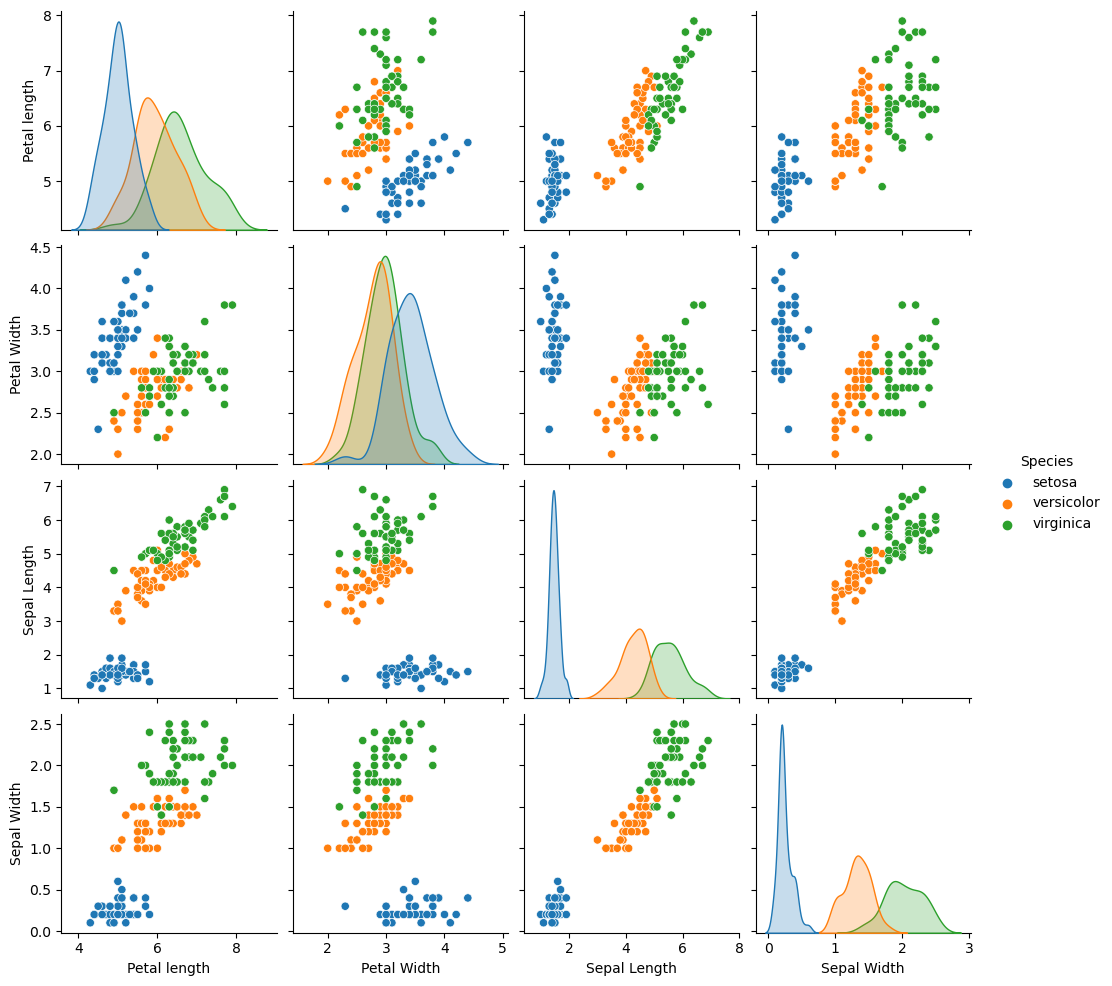

In [8]:
plt.figure(figsize=(10, 5))
sns.pairplot(data, hue='Species')
plt.show()

**Scatter Plot** <br>Scatter plots serve as a visual tool to explore and analyze the relationships between variables, utilizing dots to depict the connection between them. The matplotlib library provides the scatter() method, specifically designed for creating scatter plots. These plots are instrumental in illustrating the interdependencies among variables and how alterations in one variable can impact another.

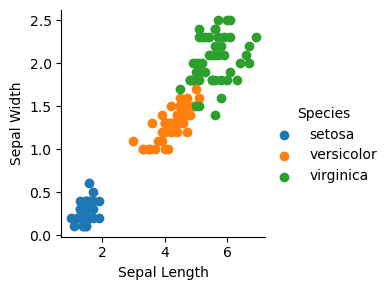

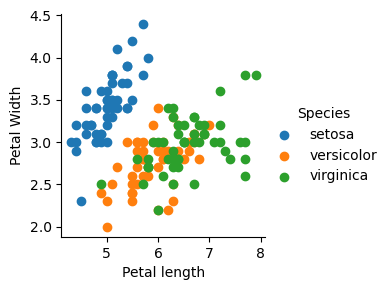

In [9]:
# Visualizing the data using Scatter plot based on Sepal Length and Width features
sns.FacetGrid(data,hue='Species').map(plt.scatter,'Sepal Length','Sepal Width').add_legend()
plt.show()

# Visualizing the data using Scatter plot based on Petal Length and Width features
sns.FacetGrid(data,hue='Species').map(plt.scatter,'Petal length','Petal Width').add_legend()
plt.show()

#### **Creating and Training the Model**

In [10]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split

# Model Training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train,y_train)
print("Training Complete.")
y_pred = tree_classifier.predict(X_test)

Training Complete.


In [11]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,0,0
1,1,1
2,1,1
3,0,0
4,2,2
5,1,1
6,2,2
7,0,0
8,0,0
9,2,2


In [12]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train ,y_train)

DecisionTreeClassifier()

In [13]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1])

#### **Measuring Model Accuracy**

In [14]:
# Model Accuracy
import sklearn.metrics as sm
print("Accuracy:",sm.accuracy_score(y_test, y_pred))

Accuracy: 1.0


#### **Visualizing the Decision Tree**

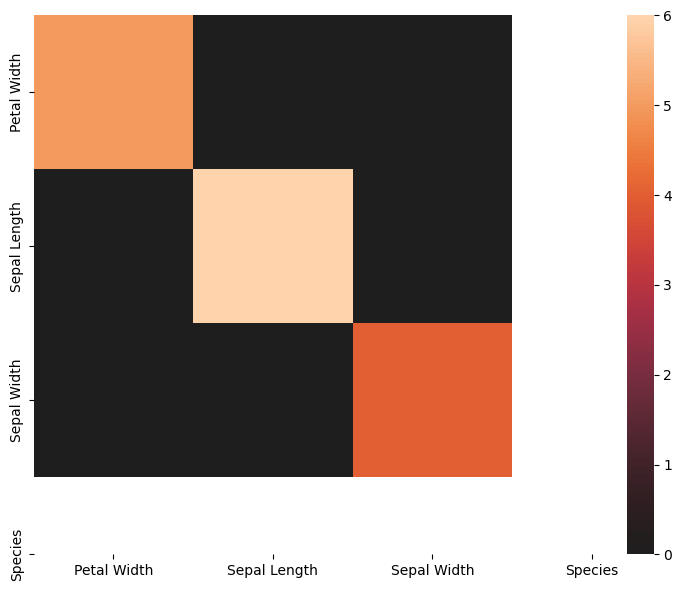

In [15]:
from sklearn import metrics
plt.figure(figsize = (9,7))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), xticklabels = data.iloc[:, 1:5].columns.values,  yticklabels = data.iloc[:, 1:5].columns.values, center = 0)
plt.show()

In [16]:
print(f"Precision: {metrics.precision_score(y_test, y_pred, average = 'macro')}")
print(f"Recall: {metrics.recall_score(y_test, y_pred, average = 'macro')}")
print(f"F1 Score: {metrics.f1_score(y_test, y_pred, average = 'macro')}")

Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [20]:
from sklearn import tree

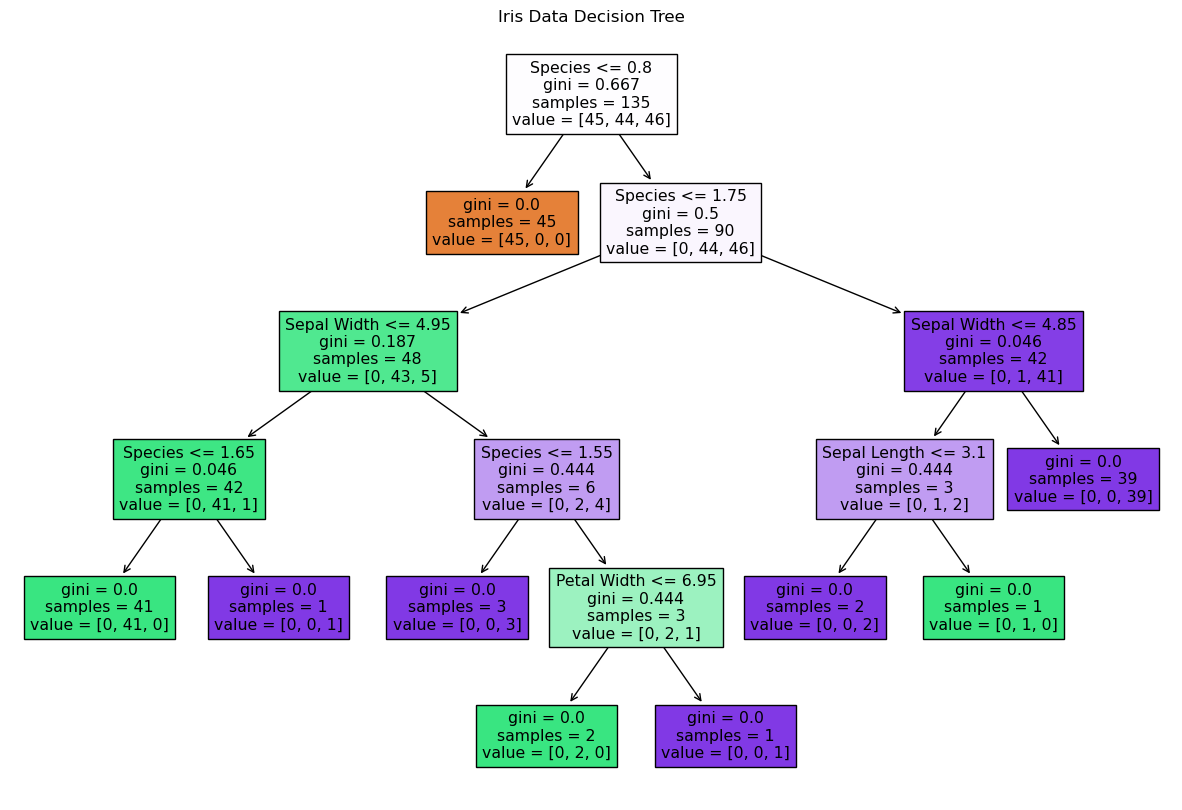

In [21]:
plt.figure(figsize = (15,10))
tree.plot_tree(model,
               feature_names = data.iloc[:, 1:5].columns.values,
               filled = True);
plt.title("Iris Data Decision Tree")
plt.show()

#### **Making New Predictions**

In [23]:
print("Class Names = ",iris.target_names)

# Estimating class probabilities
print()
print("Estimating Class Probabilities for flower whose petals length width are 4.7cm and 3.2cm and sepal length and width are 1.3cm and 0.2cm. ")
print()
print('Output = ',tree_classifier.predict([[4.7, 3.2, 1.3, 0.2]]))
print()
print("Our model predicts the class as 0, that is, setosa.")

Class Names =  ['setosa' 'versicolor' 'virginica']

Estimating Class Probabilities for flower whose petals length width are 4.7cm and 3.2cm and sepal length and width are 1.3cm and 0.2cm. 

Output =  [0]

Our model predicts the class as 0, that is, setosa.
